![alt text](../movie-3057394_1280.jpg)

## Business Understanding

The objective of this project is to analyze historical movie data to generate actionable insights for a new movie studio venture. Specifically, the analysis aims to identify the key factors that contribute to the commercial success of movies, focusing on profitability, audience reception, and production efficiency. This will help the studio make data-driven decisions regarding budget allocation, genre selection, and release strategies to maximize return on investment (ROI) and minimize financial risks.

## Key Business Questions:

- Which genres consistently generate the highest revenue?
- How do budgets correlate with worldwide gross?
- What are the most profitable release windows for movies?
- Which studios have the highest profit margins?
- Does the original language of a movie influence its global performance?
- Can I use movie attributes to predict revenue?

## Dataframes for Analysis

Based on the analysis goals, the following datasets will be most useful for deriving insights:

 1. **Box Office Mojo Data**  
- **Key Variables**: `title`, `studio`, `domestic_gross`, `foreign_gross`, `year`  
- **Usage**: Analyze box office performance, studio performance, and trends in domestic vs. international earnings.

 2. **The Numbers Data**  
- **Key Variables**: `movie`, `production_budget`, `domestic_gross`, `worldwide_gross`, `release_date`  
- **Usage**: Analyze the correlation between production budgets and box office revenues to assess profitability.

 3. **Rotten Tomatoes Movie Info Data**  
- **Key Variables**: `rating`, `genre`, `director`, `runtime`, `box_office`  
- **Usage**: Analyze how different factors like genre, director, and runtime impact box office performance.

 4. **TheMovieDB Data**  
- **Key Variables**: `title`, `popularity`, `vote_average`, `vote_count`, `release_date`  
- **Usage**: Investigate how popularity, audience ratings, and vote counts correlate with box office success.
<img src="../movie_data_erd.jpeg" alt="Movie Data ERD" width="400"/>

 5. **im.db.zip**
  * Zipped SQLite database (you will need to unzip then query using SQLite)
  * `movie_basics` and `movie_ratings` tables are most relevant

## Data preparation

In [1]:

# Import libraries
# Data manipulation and analysis
import pandas as pd  # pandas is used for handling and processing data in DataFrame structures
import numpy as np  # numpy is useful for numerical computations and handling arrays
import gzip  # gzip is for handling compressed files

# Data visualization
import matplotlib.pyplot as plt  # matplotlib is used for creating static, interactive, and animated visualizations
import seaborn as sns  # seaborn provides a high-level interface for drawing attractive statistical graphics

# Database interaction
import sqlite3  # sqlite3 is used to connect to SQLite databases
import nbconvert  # nbconvert is used to convert Jupyter Notebooks into various formats
import os
import re

# Set visualization style
sns.set_theme(style="whitegrid")




### 1. **Box Office Mojo Data**

In [2]:
# Define the path to your raw zipped data
file_path = 'C:/Users/USER/Desktop/Movie-Project/data/raw/zippedData/bom.movie_gross.csv.gz'

# Load the gzipped CSV directly
bom_gross = pd.read_csv(file_path, compression='gzip')

# Display the first few rows of the data
display(bom_gross.head())
bom_gross.dtypes

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

### 2. **The Numbers Data**

In [3]:
# Load The Numbers (movie budgets) dataset
tn_budgets = pd.read_csv('C:/Users/USER/Desktop/Movie-Project/data/raw/zippedData/tn.movie_budgets.csv.gz', compression='gzip') 
print("The Numbers Data:")
display(tn_budgets.head())  # Display the first few rows
print(tn_budgets.info())  # Get an overview of the dataset

The Numbers Data:


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None


### 3. **Rotten Tomatoes Movie Info Data**

In [4]:
# Load Rotten Tomatoes Reviews dataset
rt_reviews = pd.read_csv('C:/Users/USER/Desktop/Movie-Project/data/raw/zippedData/rt.reviews.tsv.gz', compression='gzip', sep='\t', encoding='latin-1') 
print("Rotten Tomatoes Reviews Data:")
display(rt_reviews.head(), "\n")  # Display the first few rows
print(rt_reviews.info())  # Get an overview of the dataset

Rotten Tomatoes Reviews Data:


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


'\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB
None


### 4. **TheMovieDB Data**

In [5]:
# Load Rotten Tomatoes Movie Info dataset
rt_info = pd.read_csv('C:/Users/USER/Desktop/Movie-Project/data/raw/zippedData/rt.movie_info.tsv.gz', compression='gzip', sep='\t') 
print("Rotten Tomatoes Movie Info Data:")
display(rt_info.head())  # Display the first few rows
print(rt_info.info())  # Get an overview of the dataset

Rotten Tomatoes Movie Info Data:


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB
None


### 5. **tmdb.movies**

In [6]:
# Load TMDB dataset
tmdb_movies = pd.read_csv('C:/Users/USER/Desktop/Movie-Project/data/raw/zippedData/tmdb.movies.csv.gz', compression='gzip') 
print("TheMovieDB Data:")
print(tmdb_movies.info())  # Get an overview of the dataset
display(tmdb_movies.head(), "\n")  # Display the first few rows

TheMovieDB Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB
None


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


'\n'

### **6.im.db.zip** 
  * Zipped SQLite database 

In [7]:
# Path to the SQL database file
db_path = 'C:/Users/USER/Desktop/dsc-phase-2-project-v3-main/unzipped/im.db'

# Connecting to the database
conn = sqlite3.connect(db_path)

# Load tables from the database
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)

In [8]:
display(movie_basics.head())  # Display the first few rows
print(movie_basics.info())  # Get an overview of the dataset

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None


In [9]:
display(movie_ratings.head())  # Display the first few rows
print(movie_ratings.info())  # Get an overview of the dataset

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None


<img src="https://media.giphy.com/media/l4RKhOL0xiBdbgglFi/giphy.gif" alt="Excited GIF" width="400"/>

Since I have all the data loaded I shall proceed to  cleaning it throughly.


## Data Cleaning

### 1.1 **Box Office Mojo Data**

In [10]:

# Convert 'foreign_gross' to numeric by removing non-numeric characters
bom_gross['foreign_gross'] = bom_gross['foreign_gross'].replace('[^0-9]', '', regex=True).astype(float)


# Convert 'year' column to integer type, handling non-convertible values
bom_gross['year'] = pd.to_numeric(bom_gross['year'], errors='coerce').astype('Int64')

#Remove special characters and multiple spaces to standardize title
bom_gross['title'] = (
    bom_gross['title']
    .str.lower()
    .str.strip()
    .str.replace(r'[^\w\s]', '', regex=True)
    .str.replace(r'\s+', ' ', regex=True)
)


# Drop duplicate rows
bom_gross = bom_gross.drop_duplicates()

# Remove all rows with any NaN values
bom_gross.dropna(inplace=True)

# Display the first few rows of the data
display(bom_gross.head())

# Check for missing values
print(bom_gross.isnull().sum())

# Display dataset info
bom_gross.info()

# Save the DataFrame to a CSV file
bom_gross.to_csv('C:/Users/USER/Desktop/movie_insights/zippedData/processed/bom_gross.csv', index=False)
print("Dataset information saved as 'bom_gross_info.csv'.")

,title,studio,domestic_gross,foreign_gross,year
0,toy story 3,BV,415000000.0,652000000.0,2010
1,alice in wonderland 2010,BV,334200000.0,691300000.0,2010
2,harry potter and the deathly hallows part 1,WB,296000000.0,664300000.0,2010
3,inception,WB,292600000.0,535700000.0,2010
4,shrek forever after,P/DW,238700000.0,513900000.0,2010


title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            2007 non-null   Int64  
dtypes: Int64(1), float64(2), object(2)
memory usage: 96.0+ KB
Dataset information saved as 'bom_gross_info.csv'.


### 1.2. **The Numbers Data**

In [11]:
# Remove '$' and ',' from financial columns and convert them to numeric
for col in ['production_budget', 'domestic_gross', 'worldwide_gross']:
    tn_budgets[col] = tn_budgets[col].replace(r'[\$,]', '', regex=True).astype(float)

# Convert 'release_date' to datetime
tn_budgets['release_date'] = pd.to_datetime(tn_budgets['release_date'], errors='coerce')

#Extracting year from release_date
tn_budgets['year'] = tn_budgets['release_date'].dt.year

#Remove special characters and multiple spaces to standardize 'movie'
tn_budgets['movie'] = (
    tn_budgets['movie']
    .str.lower()
    .str.strip()
    .str.replace(r'[^\w\s]', '', regex=True)
    .str.replace(r'\s+', ' ', regex=True)
)


# Display the first few rows of the data
display(tn_budgets.head())

# Check for missing values
print(tn_budgets.isnull().sum())

# Display dataset info
tn_budgets.info()

# Save the DataFrame to a CSV file
tn_budgets.to_csv('C:/Users/USER/Desktop/movie_insights/zippedData/processed/tn_budgets.csv', index=False)
print("Dataset saved as 'tn_budgets.csv'.")

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,2009-12-18,avatar,425000000.0,760507625.0,2.776345e+09,2009
1,2,2011-05-20,pirates of the caribbean on stranger tides,410600000.0,241063875.0,1.045664e+09,2011
2,3,2019-06-07,dark phoenix,350000000.0,42762350.0,1.497624e+08,2019
3,4,2015-05-01,avengers age of ultron,330600000.0,459005868.0,1.403014e+09,2015
4,5,2017-12-15,star wars ep viii the last jedi,317000000.0,620181382.0,1.316722e+09,2017


id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
year                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
 6   year               5782 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(1)
memory usage: 293.7+ KB
Dataset saved as 'tn_budgets.csv'.


### 1.3. **TMDB Dataset**

In [12]:
# Drop the unnecessary 'Unnamed: 0' & 'genre_ids'columns 
tmdb_movies.drop(columns=['Unnamed: 0','genre_ids'], inplace=True)


# Convert 'release_date' to datetime 
tmdb_movies['release_date'] = pd.to_datetime(tmdb_movies['release_date'], errors='coerce')

#Remove special characters and multiple spaces to standardize
tmdb_movies['title'] = (
    tmdb_movies['title']
    .str.lower()
    .str.strip()
    .str.replace(r'[^\w\s]', '', regex=True)
    .str.replace(r'\s+', ' ', regex=True)
)


# Display the first few rows 
display(tmdb_movies.head())

# Check for missing values 
print(tmdb_movies.isnull().sum())

# Display dataset info 
tmdb_movies.info()

# Save the DataFrame to a CSV file
tmdb_movies.to_csv('C:/Users/USER/Desktop/movie_insights/zippedData/processed/tmdb_movies.csv', index=False)
print("Dataset saved as 'tmdb_movies.csv'.")

,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,harry potter and the deathly hallows part 1,7.7,10788
1,10191,en,How to Train Your Dragon,28.734,2010-03-26,how to train your dragon,7.7,7610
2,10138,en,Iron Man 2,28.515,2010-05-07,iron man 2,6.8,12368
3,862,en,Toy Story,28.005,1995-11-22,toy story,7.9,10174
4,27205,en,Inception,27.920,2010-07-16,inception,8.3,22186


id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 26517 non-null  int64         
 1   original_language  26517 non-null  object        
 2   original_title     26517 non-null  object        
 3   popularity         26517 non-null  float64       
 4   release_date       26517 non-null  datetime64[ns]
 5   title              26517 non-null  object        
 6   vote_average       26517 non-null  float64       
 7   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 1.6+ MB
Dataset saved as 'tmdb_movies.csv'.


### 1.4. **Rotten Tomatoes Reviews Data**

In [13]:
# Drop rows where `review` or `rating` is missing
rt_reviews.dropna(subset=['review', 'rating', 'critic'], inplace=True)


# Convert `date` column to datetime
rt_reviews['date'] = pd.to_datetime(rt_reviews['date'], errors='coerce')

# Convert Data Types
# Parse `rating` to extract numeric scores (e.g., '3/5' -> 3.0)
def parse_rating(rating):
    try:
        return float(rating.split('/')[0]) if '/' in rating else None
    except:
        return None

rt_reviews['rating'] = rt_reviews['rating'].apply(parse_rating)

# Drop rows with missing  `rating_score`
rt_reviews.dropna(subset=['rating'], inplace=True)

# Remove Duplicates
rt_reviews.drop_duplicates(inplace=True)

# Rename Columns to snake_case
rt_reviews.rename(columns={
    'review': 'review_text',
    'rating': 'rating_score',
    'fresh': 'is_fresh',
    'critic': 'critic_name',
    'top_critic': 'is_top_critic',
    'publisher': 'publisher_name',
    'date': 'review_date'
}, inplace=True)

print("Rotten Tomatoes Reviews Data:")
print(rt_reviews.info())  # Get an overview of the dataset
display(rt_reviews.head())  # Display the first few rows

# Save the DataFrame to a CSV file
rt_reviews.to_csv('C:/Users/USER/Desktop/movie_insights/zippedData/processed/rt_reviews.csv', index=False)
print("Dataset saved as 'rt_reviews.csv'.")


Rotten Tomatoes Reviews Data:
<class 'pandas.core.frame.DataFrame'>
Index: 27745 entries, 0 to 54424
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              27745 non-null  int64         
 1   review_text     27745 non-null  object        
 2   rating_score    27745 non-null  float64       
 3   is_fresh        27745 non-null  object        
 4   critic_name     27745 non-null  object        
 5   is_top_critic   27745 non-null  int64         
 6   publisher_name  27587 non-null  object        
 7   review_date     27745 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 1.9+ MB
None


,id,review_text,rating_score,is_fresh,critic_name,is_top_critic,publisher_name,review_date
0,3,A distinctly gallows take on contemporary fina...,3.0,fresh,PJ Nabarro,0,Patrick Nabarro,2018-11-10
7,3,Cronenberg is not a director to be daunted by ...,2.0,rotten,Matt Kelemen,0,Las Vegas CityLife,2013-04-21
12,3,Robert Pattinson works mighty hard to make Cos...,2.0,rotten,Christian Toto,0,Big Hollywood,2013-01-15
14,3,For those who like their Cronenberg thick and ...,3.0,fresh,Marty Mapes,0,Movie Habit,2012-10-20
15,3,For better or worse - often both - Cosmopolis ...,3.0,fresh,Adam Ross,0,The Aristocrat,2012-09-27


Dataset saved as 'rt_reviews.csv'.


<img src="https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExenpwZmpqdXo4YTF2eXY0Zzl3eDZ3bm00ZXZzd3BnOTZ5NHRyZ2tuMSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/26gscNQHswYio5RBu/giphy.webp" alt="Fun GIF" width="400"/>


### 1.5. **Rotten Tomatoes Movie Info Data**

In [14]:
# Convert to datetime and coerce invalid dates to NaT
rt_info['theater_date'] = pd.to_datetime(rt_info['theater_date'], errors='coerce')
rt_info['dvd_date'] = pd.to_datetime(rt_info['dvd_date'], errors='coerce')

# Clean 'runtime' to extract numerical values
rt_info['runtime'] = rt_info['runtime'].str.extract(r'(\d+)').astype(float)  # Use a raw string


# Clean 'box_office' to extract numerical values
rt_info['box_office'] = rt_info['box_office'].replace(r'[\$,]', '', regex=True).astype(float)

# Drop all rows with any NaN values
rt_info.dropna(inplace=True)

# Display the cleaned dataset
print("After dropping all rows with NaN values:")
print(rt_info.info())
display(rt_info.head())

# Save the DataFrame to a CSV file
rt_reviews.to_csv('C:/Users/USER/Desktop/movie_insights/zippedData/processed/rt_info.csv', index=False)
print("Dataset saved as 'rt_info.csv'.")

After dropping all rows with NaN values:
<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 1 to 1545
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            235 non-null    int64         
 1   synopsis      235 non-null    object        
 2   rating        235 non-null    object        
 3   genre         235 non-null    object        
 4   director      235 non-null    object        
 5   writer        235 non-null    object        
 6   theater_date  235 non-null    datetime64[ns]
 7   dvd_date      235 non-null    datetime64[ns]
 8   currency      235 non-null    object        
 9   box_office    235 non-null    float64       
 10  runtime       235 non-null    float64       
 11  studio        235 non-null    object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 23.9+ KB
None


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,600000.0,108.0,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,2002-01-11,2002-06-18,$,41032915.0,82.0,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,2006-04-27,2007-10-02,$,224114.0,123.0,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,2010-12-17,2011-04-05,$,1039869.0,108.0,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,2013-12-25,2014-04-01,$,20518224.0,127.0,Universal Pictures


Dataset saved as 'rt_info.csv'.


### 1.6.**im.db.zip** 

* Zipped SQLite database 


  

#### a. **movie_basics**

In [15]:
# Display the first few rows 
display(movie_basics.head())
movie_basics.info()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [16]:
# Drop rows where 'runtime_minutes' or 'genres' columns have missing values
movie_basics.dropna(subset=['runtime_minutes', 'genres'], inplace=True)

# Drop any remaining rows with missing values in any column
movie_basics.dropna(inplace=True)

# Normalize 'primary_title' and 'original_title' columns: lowercase, remove punctuation, trim spaces
string_columns = ['primary_title', 'original_title']
for col in string_columns:
    movie_basics[col] = (
        movie_basics[col]
        .str.lower()  # Convert to lowercase
        .str.strip()  # Remove leading/trailing spaces
        .str.replace(r'[^\w\s]', '', regex=True)  # Remove punctuation
        .str.replace(r'\s+', ' ', regex=True)  # Replace multiple spaces with a single space
    )

# Display the first few rows to inspect changes
print("\nPreview of cleaned movie_basics dataset:")
display(movie_basics.head())

# Display information about the cleaned dataframe
print("\nInformation about cleaned movie_basics dataset:")
movie_basics.info()

# Save the DataFrame to a CSV file
rt_reviews.to_csv('C:/Users/USER/Desktop/movie_insights/zippedData/processed/movie_basics.csv', index=False)
print("Dataset saved as 'movie_basics.csv'.")



Preview of cleaned movie_basics dataset:


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,sunghursh,sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,one day before the rainy season,ashad ka ek din,2019,114.0,"Biography,Drama"
2,tt0069049,the other side of the wind,the other side of the wind,2018,122.0,Drama
4,tt0100275,the wandering soap opera,la telenovela errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,a thin life,a thin life,2018,75.0,Comedy



Information about cleaned movie_basics dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 112232 entries, 0 to 146139
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         112232 non-null  object 
 1   primary_title    112232 non-null  object 
 2   original_title   112232 non-null  object 
 3   start_year       112232 non-null  int64  
 4   runtime_minutes  112232 non-null  float64
 5   genres           112232 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.0+ MB
Dataset saved as 'movie_basics.csv'.


#### b. **movie_ratings**

In [17]:
# Display the first few rows of the movie_ratings dataframe
display(movie_ratings.head())

# Display detailed information about the dataframe
movie_ratings.info()

# Observed that there are no missing values in any column of the dataframe.
print(f'The movie_ratings dataframe is already clean with no missing values.')

# Save the DataFrame to a CSV file
rt_reviews.to_csv('C:/Users/USER/Desktop/movie_insights/zippedData/processed/movie_ratings.csv', index=False)
print("Dataset saved as 'movie_ratings.csv'.")


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
The movie_ratings dataframe is already clean with no missing values.
Dataset saved as 'movie_ratings.csv'.


## **3. Data Preparation**


### 3.1. **Merging Datasets**

In [18]:
# Prepare `bom_gross` and `tn_budgets` for merging
tn_budgets['year'] = tn_budgets['release_date'].dt.year  # Extract year from release_date

# Clean the 'title' field in bom_gross
bom_gross['title'] = (
    bom_gross['title']
    .str.lower()  # Convert to lowercase
    .str.strip()  # Remove leading and trailing whitespace
    .str.replace(r'[^\w\s]', '', regex=True)  # Remove special characters
    .str.replace(r'\s+', ' ', regex=True)  # Replace multiple spaces with a single space
)

# Clean the 'title' field in tn_budgets
tn_budgets['movie'] = (
    tn_budgets['movie']
    .str.lower()  # Convert to lowercase
    .str.strip()  # Remove leading and trailing whitespace
    .str.replace(r'[^\w\s]', '', regex=True)  # Remove special characters
    .str.replace(r'\s+', ' ', regex=True)  # Replace multiple spaces with a single space
)
#Check Overlap Between bom_gross and tmdb_movies:
matched_titles = bom_gross['title'].isin(tmdb_movies['title']).sum()
print(f"Number of matched titles between bom_gross and tmdb_movies: {matched_titles}")

Number of matched titles between bom_gross and tmdb_movies: 1560


In [19]:
#Check Overlap Between bom_gross and tmdb_movies:
matched_titles = movie_basics['original_title'].isin(tmdb_movies['original_title']).sum()
print(f"Number of matched titles between bom_gross and tmdb_movies: {matched_titles}")

Number of matched titles between bom_gross and tmdb_movies: 67


In [20]:
#Check Overlap Between tn_budgets and tmdb_movies:
matched_titles = tn_budgets['movie'].isin(tmdb_movies['title']).sum()
print(f"Number of matched titles between tn_budgets and tmdb_movies: {matched_titles}")

Number of matched titles between tn_budgets and tmdb_movies: 2051


In [21]:
#Check for duplicates in title_normalized:

display("Duplicates in bom_gross:", bom_gross[bom_gross['title'].duplicated()])
display("Duplicates in tn_budgets:", tn_budgets[tn_budgets['movie'].duplicated()])
display("Duplicates in tmdb_movies:", tmdb_movies[tmdb_movies['title'].duplicated()])

'Duplicates in bom_gross:'

,title,studio,domestic_gross,foreign_gross,year


'Duplicates in tn_budgets:'

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
273,74,1998-05-19,godzilla,125000000.0,136314294.0,376000000.0,1998
408,9,2018-11-21,robin hood,99000000.0,30824628.0,84747441.0,2018
484,85,2005-07-08,fantastic four,87500000.0,154696080.0,333132750.0,2005
543,44,1999-05-07,the mummy,80000000.0,155385488.0,416385488.0,1999
707,8,1997-06-13,hercules,70000000.0,99112101.0,250700000.0,1997
...,...,...,...,...,...,...,...
5668,69,1942-11-16,cat people,134000.0,4000000.0,8000000.0,1942
5676,77,1968-10-01,night of the living dead,114000.0,12087064.0,30087064.0,1968
5677,78,1915-02-08,the birth of a nation,110000.0,10000000.0,11000000.0,1915
5699,100,1972-08-30,the last house on the left,87000.0,3100000.0,3100000.0,1972


'Duplicates in tmdb_movies:'

,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
781,51462,en,Brotherhood,2.235,2010-01-03,brotherhood,6.2,31
1037,44369,tl,Boy,1.504,2009-06-01,boy,7.5,2
1230,371702,en,All That Glitters,1.241,2010-09-25,all that glitters,10.0,1
1354,155711,en,After-Life,0.994,2010-01-01,afterlife,5.5,20
1501,36410,en,Zero,0.840,2010-02-06,zero,5.8,6
...,...,...,...,...,...,...,...,...
26495,556601,en,Recursion,0.600,2018-08-28,recursion,2.0,1
26504,534282,en,Head,0.600,2015-03-28,head,1.0,1
26506,561861,en,Eden,0.600,2018-11-25,eden,0.0,1
26510,495045,en,Fail State,0.600,2018-10-19,fail state,0.0,1


In [22]:
#Remove duplicates:
tn_budgets.drop_duplicates(subset='movie', inplace=True)
tmdb_movies.drop_duplicates(subset='title', inplace=True)

In [23]:
#Check for duplicates in title_normalized:

display("Duplicates in bom_gross:", bom_gross[bom_gross['title'].duplicated()])
display("Duplicates in tn_budgets:", tn_budgets[tn_budgets['movie'].duplicated()])
display("Duplicates in tmdb_movies:", tmdb_movies[tmdb_movies['title'].duplicated()])

'Duplicates in bom_gross:'

,title,studio,domestic_gross,foreign_gross,year


'Duplicates in tn_budgets:'

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year


'Duplicates in tmdb_movies:'

,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count


#### Join bom_gross and tmdb_movies

In [24]:
#Join bom_gross and tmdb_movies
bom_tmdb_merged = pd.merge(bom_gross, tmdb_movies, on='title', how='inner', suffixes=('_bom', '_tmdb'))
print(f"bom_tmdb_merged shape: {bom_tmdb_merged.shape}")

# Check for missing values
missing_values = bom_tmdb_merged.isna().sum()
print("\nMissing values in bom_tmdb_merged:")
print(missing_values)

# Preview merged data
print("\nPreview of merged dataset:")
display(bom_tmdb_merged.head())


bom_tmdb_merged shape: (1560, 12)

Missing values in bom_tmdb_merged:
title                0
studio               0
domestic_gross       0
foreign_gross        0
year                 0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
vote_average         0
vote_count           0
dtype: int64

Preview of merged dataset:


,title,studio,domestic_gross,foreign_gross,year,id,original_language,original_title,popularity,release_date,vote_average,vote_count
0,toy story 3,BV,415000000.0,652000000.0,2010,10193,en,Toy Story 3,24.445,2010-06-17,7.7,8340
1,harry potter and the deathly hallows part 1,WB,296000000.0,664300000.0,2010,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,7.7,10788
2,inception,WB,292600000.0,535700000.0,2010,27205,en,Inception,27.920,2010-07-16,8.3,22186
3,shrek forever after,P/DW,238700000.0,513900000.0,2010,10192,en,Shrek Forever After,15.041,2010-05-16,6.1,3843
4,the twilight saga eclipse,Sum.,300500000.0,398000000.0,2010,24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909


#### 'movie' from tn_budgets and 'title' from tmdb_movies

In [25]:
# Merge using 'movie' from tn_budgets and 'title' from tmdb_movies
budgets_tmdb_merged = pd.merge(
    tn_budgets, tmdb_movies, 
    left_on='movie', right_on='title', 
    how='inner', suffixes=('_budget', '_tmdb')
)

# Print shape of the merged dataframe
print(f"budgets_tmdb_merged shape: {budgets_tmdb_merged.shape}")


budgets_tmdb_merged shape: (1998, 15)


In [26]:
# Check for missing values in the merged dataset
missing_values = budgets_tmdb_merged.isna().sum()
print("\nMissing values in budgets_tmdb_merged:")
print(missing_values)

#Preview merged dataset
print("\nPreview of merged dataset:")
display(budgets_tmdb_merged.head())


Missing values in budgets_tmdb_merged:
id_budget              0
release_date_budget    0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
year                   0
id_tmdb                0
original_language      0
original_title         0
popularity             0
release_date_tmdb      0
title                  0
vote_average           0
vote_count             0
dtype: int64

Preview of merged dataset:


,id_budget,release_date_budget,movie,production_budget,domestic_gross,worldwide_gross,year,id_tmdb,original_language,original_title,popularity,release_date_tmdb,title,vote_average,vote_count
0,1,2009-12-18,avatar,425000000.0,760507625.0,2.776345e+09,2009,19995,en,Avatar,26.526,2009-12-18,avatar,7.4,18676
1,2,2011-05-20,pirates of the caribbean on stranger tides,410600000.0,241063875.0,1.045664e+09,2011,1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,pirates of the caribbean on stranger tides,6.4,8571
2,4,2015-05-01,avengers age of ultron,330600000.0,459005868.0,1.403014e+09,2015,99861,en,Avengers: Age of Ultron,44.383,2015-05-01,avengers age of ultron,7.3,13457
3,7,2018-04-27,avengers infinity war,300000000.0,678815482.0,2.048134e+09,2018,299536,en,Avengers: Infinity War,80.773,2018-04-27,avengers infinity war,8.3,13948
4,9,2017-11-17,justice league,300000000.0,229024295.0,6.559452e+08,2017,141052,en,Justice League,34.953,2017-11-17,justice league,6.2,7510


In [27]:
# Combine all three datasets
final_merged = pd.merge(
    bom_tmdb_merged, budgets_tmdb_merged, 
    on='title', 
    how='inner', 
    suffixes=('_bom_tmdb', '_budget_tmdb')
)
print(f"final_merged shape: {final_merged.shape}")

final_merged shape: (1082, 26)


In [28]:
#Check for missing values
print("\nMissing values in final_merged:")
print(final_merged.isna().sum())

# Preview the final merged dataset
display(final_merged.head())


Missing values in final_merged:
title                            0
studio                           0
domestic_gross_bom_tmdb          0
foreign_gross                    0
year_bom_tmdb                    0
id                               0
original_language_bom_tmdb       0
original_title_bom_tmdb          0
popularity_bom_tmdb              0
release_date                     0
vote_average_bom_tmdb            0
vote_count_bom_tmdb              0
id_budget                        0
release_date_budget              0
movie                            0
production_budget                0
domestic_gross_budget_tmdb       0
worldwide_gross                  0
year_budget_tmdb                 0
id_tmdb                          0
original_language_budget_tmdb    0
original_title_budget_tmdb       0
popularity_budget_tmdb           0
release_date_tmdb                0
vote_average_budget_tmdb         0
vote_count_budget_tmdb           0
dtype: int64


,title,studio,domestic_gross_bom_tmdb,foreign_gross,year_bom_tmdb,id,original_language_bom_tmdb,original_title_bom_tmdb,popularity_bom_tmdb,release_date,...,domestic_gross_budget_tmdb,worldwide_gross,year_budget_tmdb,id_tmdb,original_language_budget_tmdb,original_title_budget_tmdb,popularity_budget_tmdb,release_date_tmdb,vote_average_budget_tmdb,vote_count_budget_tmdb
0,toy story 3,BV,415000000.0,652000000.0,2010,10193,en,Toy Story 3,24.445,2010-06-17,...,415004880.0,1.068880e+09,2010,10193,en,Toy Story 3,24.445,2010-06-17,7.7,8340
1,inception,WB,292600000.0,535700000.0,2010,27205,en,Inception,27.920,2010-07-16,...,292576195.0,8.355246e+08,2010,27205,en,Inception,27.920,2010-07-16,8.3,22186
2,shrek forever after,P/DW,238700000.0,513900000.0,2010,10192,en,Shrek Forever After,15.041,2010-05-16,...,238736787.0,7.562447e+08,2010,10192,en,Shrek Forever After,15.041,2010-05-16,6.1,3843
3,the twilight saga eclipse,Sum.,300500000.0,398000000.0,2010,24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23,...,300531751.0,7.061028e+08,2010,24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909
4,iron man 2,Par.,312400000.0,311500000.0,2010,10138,en,Iron Man 2,28.515,2010-05-07,...,312433331.0,6.211564e+08,2010,10138,en,Iron Man 2,28.515,2010-05-07,6.8,12368


In [29]:
# Remove unnecessary or duplicate columns
columns_to_drop = [
    'id', 'id_budget', 'id_tmdb', 'release_date_tmdb', 'year_budget_tmdb','domestic_gross_bom_tmdb','popularity_budget_tmdb',
    'original_language_budget_tmdb', 'original_title_bom_tmdb', 'vote_count_budget_tmdb','vote_average_bom_tmdb',
    'release_date_budget', 'original_title_budget_tmdb'
]

final_merged_cleaned = final_merged.drop(columns=columns_to_drop)

# Rename columns for consistency and clarity
final_merged_cleaned.rename(columns={
    'release_date': 'release_date',
    'year_bom_tmdb': 'year',
    'vote_count_bom_tmdb':    'vote_count',
    'vote_average_budget_tmdb': 'vote_average',
    'domestic_gross_budget_tmdb': 'domestic_gross',
    'original_language_bom_tmdb': 'original_language',
    'popularity_bom_tmdb':'popularity'
}, inplace=True)

# Display the cleaned dataframe information
print("Cleaned final_merged DataFrame Info:")
final_merged_cleaned.info()

# Preview the cleaned dataframe
display(final_merged_cleaned.head())


Cleaned final_merged DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082 entries, 0 to 1081
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              1082 non-null   object        
 1   studio             1082 non-null   object        
 2   foreign_gross      1082 non-null   float64       
 3   year               1082 non-null   Int64         
 4   original_language  1082 non-null   object        
 5   popularity         1082 non-null   float64       
 6   release_date       1082 non-null   datetime64[ns]
 7   vote_count         1082 non-null   int64         
 8   movie              1082 non-null   object        
 9   production_budget  1082 non-null   float64       
 10  domestic_gross     1082 non-null   float64       
 11  worldwide_gross    1082 non-null   float64       
 12  vote_average       1082 non-null   float64       
dtypes: Int64(1), datetime64[ns

,title,studio,foreign_gross,year,original_language,popularity,release_date,vote_count,movie,production_budget,domestic_gross,worldwide_gross,vote_average
0,toy story 3,BV,652000000.0,2010,en,24.445,2010-06-17,8340,toy story 3,200000000.0,415004880.0,1.068880e+09,7.7
1,inception,WB,535700000.0,2010,en,27.920,2010-07-16,22186,inception,160000000.0,292576195.0,8.355246e+08,8.3
2,shrek forever after,P/DW,513900000.0,2010,en,15.041,2010-05-16,3843,shrek forever after,165000000.0,238736787.0,7.562447e+08,6.1
3,the twilight saga eclipse,Sum.,398000000.0,2010,en,20.340,2010-06-23,4909,the twilight saga eclipse,68000000.0,300531751.0,7.061028e+08,6.0
4,iron man 2,Par.,311500000.0,2010,en,28.515,2010-05-07,12368,iron man 2,170000000.0,312433331.0,6.211564e+08,6.8


In [30]:
# Save the DataFrame to a CSV file
final_merged_cleaned.to_csv('C:/Users/USER/Desktop/movie_insights/zippedData/processed/final_merged_cleaned.csv', index=False)
print("Dataset saved as 'final_merged_cleaned.csv'.")

Dataset saved as 'final_merged_cleaned.csv'.


In [31]:
#Check Overlap Between movie_basic and movie_ratings:
matched_titles = movie_basics['movie_id'].isin(movie_ratings['movie_id']).sum()
print(f"Number of matched movie_id between movie_basics and movie_ratings: {matched_titles}")

Number of matched movie_id between movie_basics and movie_ratings: 65720


In [32]:
# Merge `movie_basics` and `movie_ratings` on `movie_id`
db_data = pd.merge(movie_basics, movie_ratings, on='movie_id', how='inner')

# Display the merged DataFrame information
print("Merged db_data DataFrame Info:")
db_data.info()

# Display the first few rows of the merged DataFrame
display(db_data.head())

Merged db_data DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65720 entries, 0 to 65719
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   primary_title    65720 non-null  object 
 2   original_title   65720 non-null  object 
 3   start_year       65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           65720 non-null  object 
 6   averagerating    65720 non-null  float64
 7   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.0+ MB


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,sunghursh,sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,one day before the rainy season,ashad ka ek din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,the other side of the wind,the other side of the wind,2018,122.0,Drama,6.9,4517
3,tt0100275,the wandering soap opera,la telenovela errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,tt0137204,joe finds grace,joe finds grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [33]:
# Create a normalized version of the title for merging (without changing original title column names)
db_data['primary_title'] = (
    db_data['primary_title']
    .str.lower()
    .str.strip()
    .str.replace(r'[^\w\s]', '', regex=True)  # Remove special characters
    .str.replace(r'\s+', ' ', regex=True)  # Replace multiple spaces with a single space
)


In [34]:
#Check Overlap Between bom_gross and tmdb_movies:
matched_titles = final_merged_cleaned['title'].isin(db_data['primary_title']).sum()
print(f"Number of matched movie_id between movie_basics and movie_ratings: {matched_titles}")

Number of matched movie_id between movie_basics and movie_ratings: 1062


In [35]:
# Standardize titles for merging
final_merged_cleaned['title'] = final_merged_cleaned['title'].str.lower().str.strip()

# Merge datasets on titles
merged_data = pd.merge(
    final_merged_cleaned,
    db_data,
    left_on='title',
    right_on='primary_title',
    how='inner'
)



In [36]:
display(merged_data.head())


,title,studio,foreign_gross,year,original_language,popularity,release_date,vote_count,movie,production_budget,...,worldwide_gross,vote_average,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,toy story 3,BV,652000000.0,2010,en,24.445,2010-06-17,8340,toy story 3,200000000.0,...,1.068880e+09,7.7,tt0435761,toy story 3,toy story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,inception,WB,535700000.0,2010,en,27.920,2010-07-16,22186,inception,160000000.0,...,8.355246e+08,8.3,tt1375666,inception,inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,shrek forever after,P/DW,513900000.0,2010,en,15.041,2010-05-16,3843,shrek forever after,165000000.0,...,7.562447e+08,6.1,tt0892791,shrek forever after,shrek forever after,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,the twilight saga eclipse,Sum.,398000000.0,2010,en,20.340,2010-06-23,4909,the twilight saga eclipse,68000000.0,...,7.061028e+08,6.0,tt1325004,the twilight saga eclipse,the twilight saga eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,iron man 2,Par.,311500000.0,2010,en,28.515,2010-05-07,12368,iron man 2,170000000.0,...,6.211564e+08,6.8,tt1228705,iron man 2,iron man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690


In [37]:
print(merged_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1241 entries, 0 to 1240
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              1241 non-null   object        
 1   studio             1241 non-null   object        
 2   foreign_gross      1241 non-null   float64       
 3   year               1241 non-null   Int64         
 4   original_language  1241 non-null   object        
 5   popularity         1241 non-null   float64       
 6   release_date       1241 non-null   datetime64[ns]
 7   vote_count         1241 non-null   int64         
 8   movie              1241 non-null   object        
 9   production_budget  1241 non-null   float64       
 10  domestic_gross     1241 non-null   float64       
 11  worldwide_gross    1241 non-null   float64       
 12  vote_average       1241 non-null   float64       
 13  movie_id           1241 non-null   object        
 14  primary_

In [38]:
# Drop redundant columns 
merged_data.drop(['original_title', 'movie', 'primary_title','movie_id'], axis=1, inplace=True)

In [39]:
merged_data.info()
merged_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1241 entries, 0 to 1240
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              1241 non-null   object        
 1   studio             1241 non-null   object        
 2   foreign_gross      1241 non-null   float64       
 3   year               1241 non-null   Int64         
 4   original_language  1241 non-null   object        
 5   popularity         1241 non-null   float64       
 6   release_date       1241 non-null   datetime64[ns]
 7   vote_count         1241 non-null   int64         
 8   production_budget  1241 non-null   float64       
 9   domestic_gross     1241 non-null   float64       
 10  worldwide_gross    1241 non-null   float64       
 11  vote_average       1241 non-null   float64       
 12  start_year         1241 non-null   int64         
 13  runtime_minutes    1241 non-null   float64       
 14  genres  

,title,studio,foreign_gross,year,original_language,popularity,release_date,vote_count,production_budget,domestic_gross,worldwide_gross,vote_average,start_year,runtime_minutes,genres,averagerating,numvotes
0,toy story 3,BV,652000000.0,2010,en,24.445,2010-06-17,8340,200000000.0,415004880.0,1.068880e+09,7.7,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,inception,WB,535700000.0,2010,en,27.920,2010-07-16,22186,160000000.0,292576195.0,8.355246e+08,8.3,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,shrek forever after,P/DW,513900000.0,2010,en,15.041,2010-05-16,3843,165000000.0,238736787.0,7.562447e+08,6.1,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,the twilight saga eclipse,Sum.,398000000.0,2010,en,20.340,2010-06-23,4909,68000000.0,300531751.0,7.061028e+08,6.0,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,iron man 2,Par.,311500000.0,2010,en,28.515,2010-05-07,12368,170000000.0,312433331.0,6.211564e+08,6.8,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690


### **3.1. Derived Metrics**

#### a. Profit and Profit Margin

In [40]:
# Calculate profit by subtracting the production budget from the worldwide gross
merged_data['profit'] = merged_data['worldwide_gross'] - merged_data['production_budget']
# 'profit' is the difference between how much the movie made globally ('worldwide_gross') and how much it cost to produce ('production_budget')

# Calculate profit margin by dividing the profit by the production budget
merged_data['profit_margin'] = merged_data['profit'] / merged_data['production_budget']
# 'profit_margin' is the ratio of profit to production budget, indicating the return on investment (ROI) for the movie


#### b. Release Windows

In [41]:
# Extract the month from the 'release_date' column and store it in a new column 'release_month'
merged_data['release_month'] = merged_data['release_date'].dt.month

# Create a dictionary that maps month numbers to their corresponding month names
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Map the 'release_month' column to month names using the dictionary
merged_data['release_month_name'] = merged_data['release_month'].map(month_mapping)


# Extract the quarter from the 'release_date' column and store it in a new column 'release_quarter'
merged_data['release_quarter'] = merged_data['release_date'].dt.quarter
# The '.dt.quarter' function extracts the quarter of the year (1, 2, 3, or 4) based on the movie's release date.
# Quarters are typically divided as:
#  - Q1: January, February, March
#  - Q2: April, May, June
#  - Q3: July, August, September
#  - Q4: October, November, December


In [42]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1241 entries, 0 to 1240
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               1241 non-null   object        
 1   studio              1241 non-null   object        
 2   foreign_gross       1241 non-null   float64       
 3   year                1241 non-null   Int64         
 4   original_language   1241 non-null   object        
 5   popularity          1241 non-null   float64       
 6   release_date        1241 non-null   datetime64[ns]
 7   vote_count          1241 non-null   int64         
 8   production_budget   1241 non-null   float64       
 9   domestic_gross      1241 non-null   float64       
 10  worldwide_gross     1241 non-null   float64       
 11  vote_average        1241 non-null   float64       
 12  start_year          1241 non-null   int64         
 13  runtime_minutes     1241 non-null   float64     

#### c. Genre Analysis

In [43]:
genres_split = merged_data.assign(genres=merged_data['genres'].str.split(',')).explode('genres')


In [44]:
# Save the DataFrame to a CSV file
merged_data.to_csv('C:/Users/USER/Desktop/movie_insights/zippedData/processed/merged_movie_clean.csv', index=False)
print("Dataset saved as 'merged_movie_clean.csv'.")

Dataset saved as 'merged_movie_clean.csv'.


## **Exploratory  Data Analysis**

### Q1: Which genres consistently generate the highest revenue?

---

I will analyze which genres consistently generate the highest revenue by examining the average revenue for each genre. To identify trends, I’ll use visualizations like bar plots

genres
Animation      3.973884e+08
Adventure      3.796038e+08
Sci-Fi         3.715889e+08
Action         2.709311e+08
Fantasy        2.663832e+08
Family         2.000550e+08
Sport          1.801060e+08
Comedy         1.642282e+08
Western        1.524549e+08
Documentary    1.504499e+08
Musical        1.500816e+08
Thriller       1.437951e+08
History        1.155057e+08
Horror         1.101223e+08
Biography      1.093106e+08
Mystery        1.070858e+08
Crime          1.048086e+08
Music          1.036456e+08
Drama          1.023338e+08
War            9.268191e+07
Romance        9.153810e+07
News           6.283172e+07
Name: worldwide_gross, dtype: float64

C:\Users\USER\AppData\Local\Temp\ipykernel_11128\423743899.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


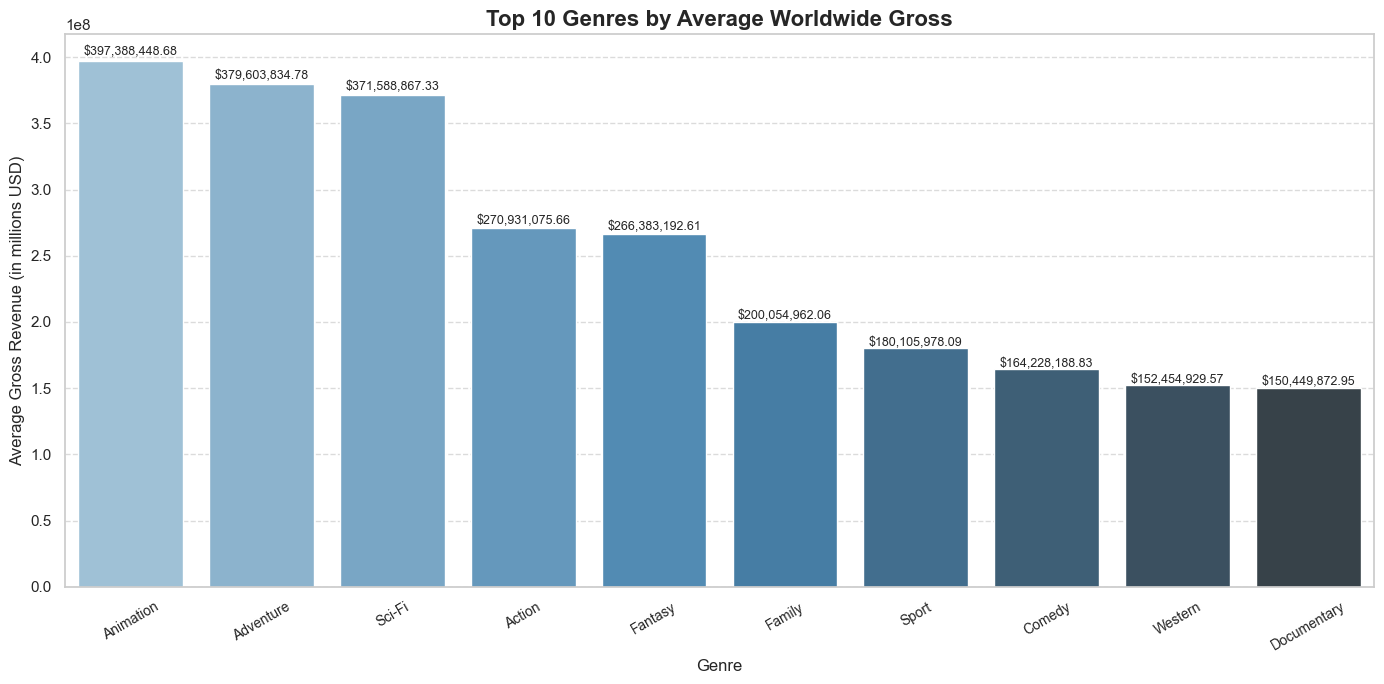

In [45]:
# Group the dataframe by 'genres' to aggregate movies by their genre
# For each genre group,I calculate the mean of 'worldwide_gross' (average revenue per genre)
genres_revenue = genres_split.groupby('genres')['worldwide_gross'].mean()

# Sort the resulting series in descending order based on the average worldwide gross
# This will display the genres with the highest average revenue at the top
genres_revenue = genres_revenue.sort_values(ascending=False)

display(genres_revenue)

# Select the top 10 genres based on average worldwide gross
top_10_genres = genres_revenue.head(10)

# Visualization of Top 10 Genres by Average Worldwide Gross
plt.figure(figsize=(14, 7))

# Use a seaborn color palette for aesthetics
sns.barplot(
    x=top_10_genres.index, 
    y=top_10_genres.values, 
    palette="Blues_d"
)

# Title and labels
plt.title('Top 10 Genres by Average Worldwide Gross', fontsize=16, weight='bold')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Gross Revenue (in millions USD)', fontsize=12)

# Rotate x-axis labels and add gridlines
plt.xticks(rotation=30, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with their values
for index, value in enumerate(top_10_genres.values):
    plt.text(index, value + (value * 0.01), f"${value:,.2f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

### How do budgets correlate with worldwide gross?
---
I’m interested in exploring how production budgets correlate with worldwide gross revenue. To investigate this, I’ll use scatter plots to visualize the relationship and calculate correlation coefficients to quantify the strength of the association.

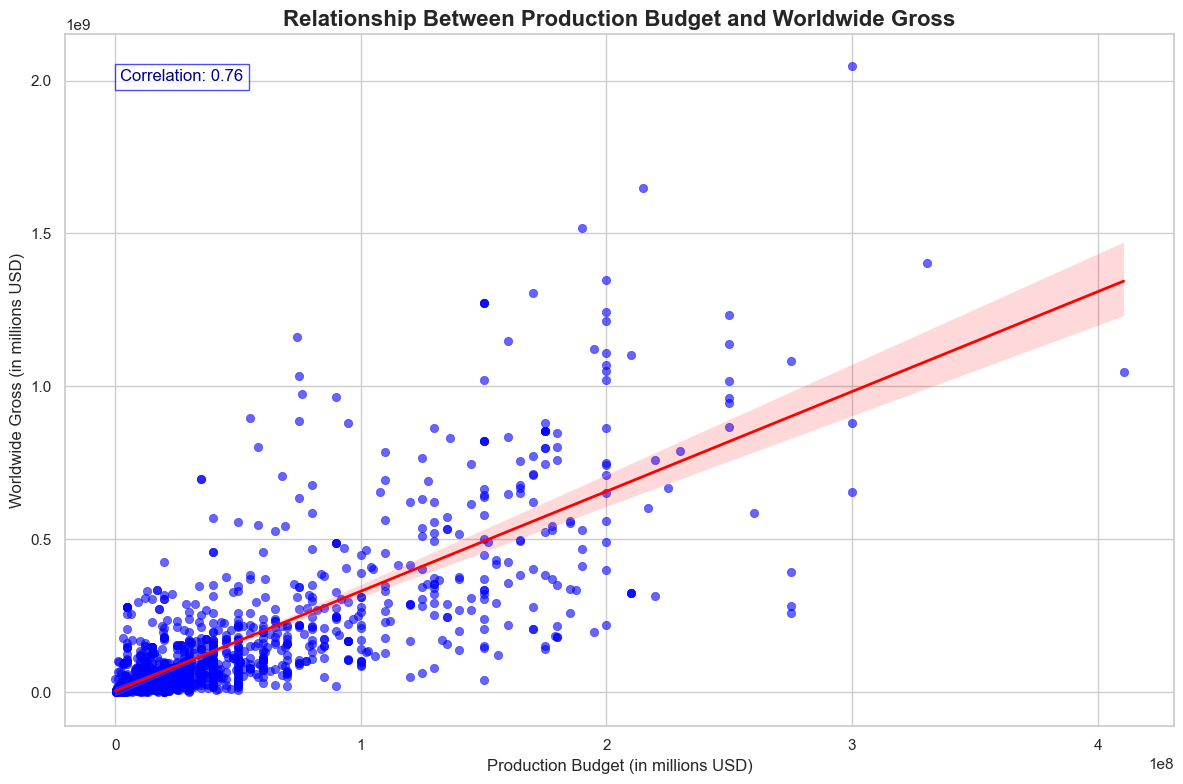

In [46]:
# Scatter plot of production budget vs worldwide gross
# Figure size for better clarity
plt.figure(figsize=(12, 8))

# Scatter plot of Production Budget vs Worldwide Gross
sns.scatterplot(
    data=merged_data, 
    x='production_budget', 
    y='worldwide_gross', 
    alpha=0.6, 
    edgecolor=None, 
    color='blue'
)

# Add a regression line to visualize the trend
sns.regplot(
    data=merged_data, 
    x='production_budget', 
    y='worldwide_gross', 
    scatter=False, 
    color='red', 
    line_kws={'linewidth': 2}
)

# Title and axis labels
plt.title('Relationship Between Production Budget and Worldwide Gross', fontsize=16, weight='bold')
plt.xlabel('Production Budget (in millions USD)', fontsize=12)
plt.ylabel('Worldwide Gross (in millions USD)', fontsize=12)

# Display the correlation coefficient on the plot
correlation = merged_data['production_budget'].corr(merged_data['worldwide_gross'])
plt.text(
    0.05, 0.95, 
    f'Correlation: {correlation:.2f}', 
    ha='left', va='top', 
    transform=plt.gca().transAxes, 
    fontsize=12, color='darkblue', 
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='blue')
)

# Show the plot
plt.tight_layout()
plt.show()


### Q3: What are the most profitable release windows for movies?
I want to find out which release windows are the most profitable for movies. By analyzing the average revenue of films released in different months

release_month_name
May          2.042898e+08
June         1.923356e+08
July         1.614964e+08
November     1.489081e+08
April        1.304827e+08
February     1.255192e+08
December     1.155203e+08
September    1.090012e+08
March        9.157966e+07
August       7.543899e+07
January      6.866001e+07
October      6.599796e+07
Name: profit, dtype: float64

C:\Users\USER\AppData\Local\Temp\ipykernel_11128\1539755437.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


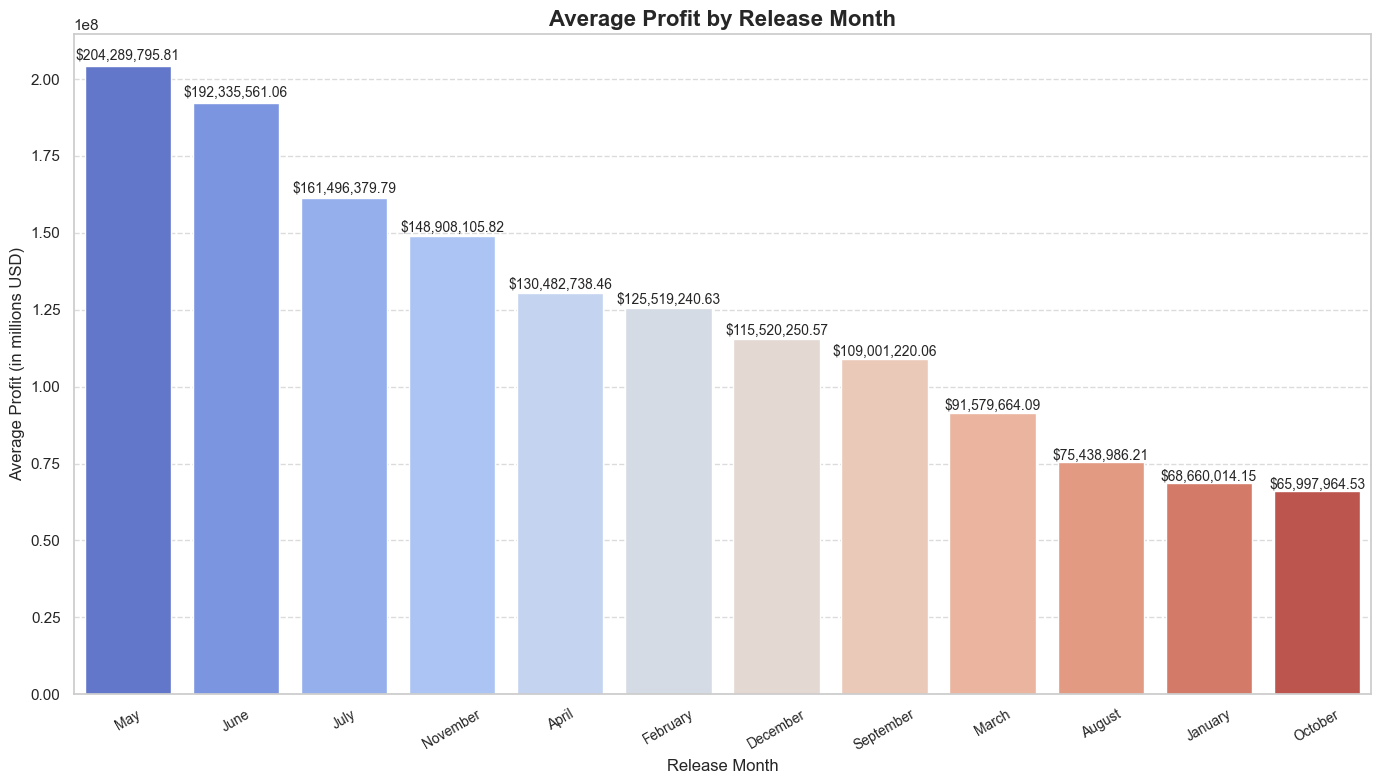

In [47]:
# Group the data by 'release_month' and calculate the average 'profit' for each month
# Then, sort the resulting values in descending order to find the months with the highest average profit
release_profit = merged_data.groupby('release_month_name')['profit'].mean().sort_values(ascending=False)
display(release_profit)


# Visualization of Average profit by release month
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average profit by release month
release_profit = merged_data.groupby('release_month_name')['profit'].mean().sort_values(ascending=False)

# Set a consistent style
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(
    x=release_profit.index, 
    y=release_profit.values, 
    palette="coolwarm"
)

# Add title and labels
plt.title('Average Profit by Release Month', fontsize=16, weight='bold')
plt.xlabel('Release Month', fontsize=12)
plt.ylabel('Average Profit (in millions USD)', fontsize=12)

# Rotate x-axis labels and add gridlines
plt.xticks(rotation=30, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with their values
for index, value in enumerate(release_profit.values):
    plt.text(index, value + (value * 0.01), f"${value:,.2f}", ha='center', fontsize=10)

# Ensure proper layout
plt.tight_layout()
plt.show()


### Q4: Which studios have the highest profit margins?
I’m curious about which studios achieve the highest profit margins. To compare profitability—calculated as worldwidegross minus budget—across production studios, I’ll use visualizations like box plots or bar charts to present the data effectively

C:\Users\USER\AppData\Local\Temp\ipykernel_11128\395597088.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


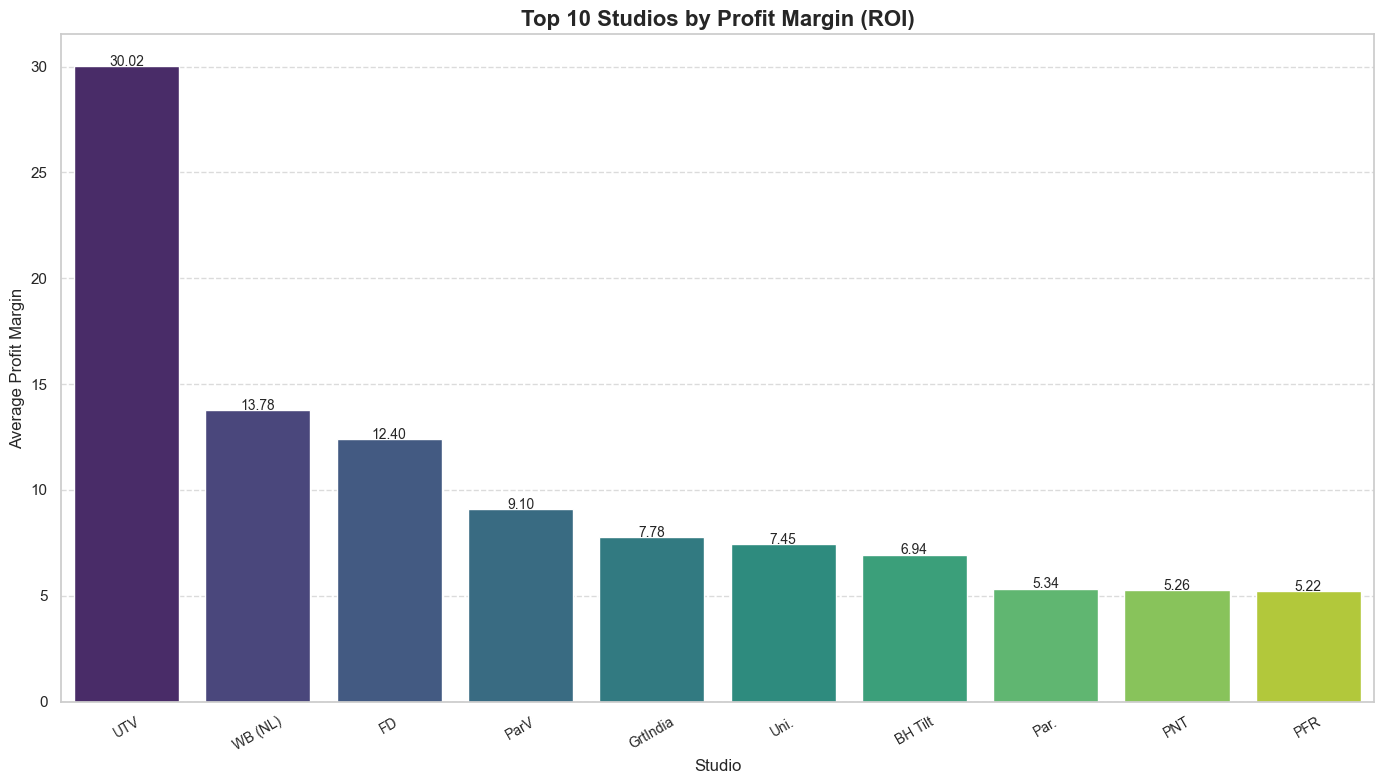

In [48]:
# Group the data by 'studio' and calculate the average 'profit_margin' for each studio
# The 'profit_margin' is the ratio of profit to the production budget, which measures the return on investment
studio_profit = merged_data.groupby('studio')['profit_margin'].mean()

# Sort the resulting series in descending order to find the studios with the highest average profit margin
# This step ensures that the studios with the highest ROI are shown at the top
studio_profit = studio_profit.sort_values(ascending=False)

# Display the resulting series
# Display the top 10 studios with the highest profit margin
top_10_studios = studio_profit.head(10)

# Set a consistent style for the plot
sns.set_style("whitegrid")

# Visualization of top 10 studios by profit margin
plt.figure(figsize=(14, 8))

# Use seaborn's barplot for a cleaner look
sns.barplot(
    x=top_10_studios.index, 
    y=top_10_studios.values, 
    palette="viridis"
)

# Add title and axis labels
plt.title('Top 10 Studios by Profit Margin (ROI)', fontsize=16, weight='bold')
plt.xlabel('Studio', fontsize=12)
plt.ylabel('Average Profit Margin', fontsize=12)

# Rotate x-axis labels for readability and add gridlines
plt.xticks(rotation=30, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with their values
for index, value in enumerate(top_10_studios.values):
    plt.text(index, value + 0.01, f"{value:.2f}", ha='center', fontsize=10)

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

### Q5: Does the original language influence global performance?

,average_worldwide_gross,number_of_movies
original_language,,
en,1.784354e+08,1214
el,9.962487e+07,3
hi,9.147224e+07,4
fr,1.460227e+07,5
de,4.495262e+06,4


C:\Users\USER\AppData\Local\Temp\ipykernel_11128\2929811603.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


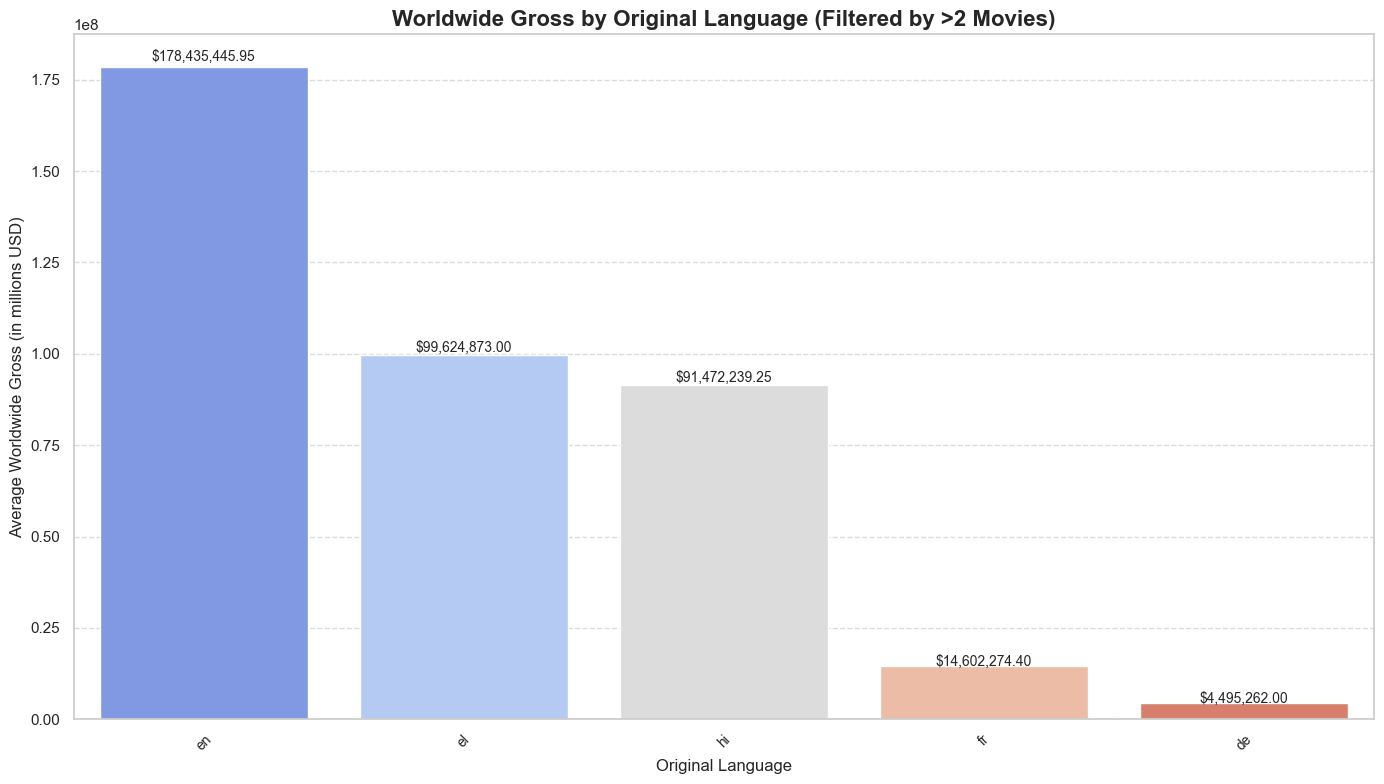

In [49]:
# Group the data by original language and calculate average worldwide gross and count of movies
language_stats = merged_data.groupby('original_language').agg(
    average_worldwide_gross=('worldwide_gross', 'mean'),  # Calculate the average worldwide gross for each language
    number_of_movies=('worldwide_gross', 'count')         # Count the number of movies for each language
)

# Filter the data to include only languages with more than 2 movies
language_stats_filtered = language_stats[language_stats['number_of_movies'] > 2]

# Sort the filtered data by average worldwide gross
language_stats_filtered = language_stats_filtered.sort_values(by='average_worldwide_gross', ascending=False)

# Display the filtered and sorted dataframe
display(language_stats_filtered)

# Prepare the data for visualization
language_revenue = language_stats_filtered['average_worldwide_gross']

# Set a consistent style for the plot
sns.set_style("whitegrid")

# Create a bar plot for average worldwide gross by original language
plt.figure(figsize=(14, 8))
sns.barplot(
    x=language_revenue.index, 
    y=language_revenue.values, 
    palette="coolwarm"
)

# Add titles and labels
plt.title('Worldwide Gross by Original Language (Filtered by >2 Movies)', fontsize=16, weight='bold')
plt.xlabel('Original Language', fontsize=12)
plt.ylabel('Average Worldwide Gross (in millions USD)', fontsize=12)

# Rotate x-axis labels for better readability and add gridlines
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with their values
for index, value in enumerate(language_revenue.values):
    plt.text(index, value + (value * 0.01), f"${value:,.2f}", ha='center', fontsize=10)

# Ensure layout doesn't get cut off
plt.tight_layout()
plt.show()


### **Q6: How do ratings (average and votes) correlate with revenue?**
---


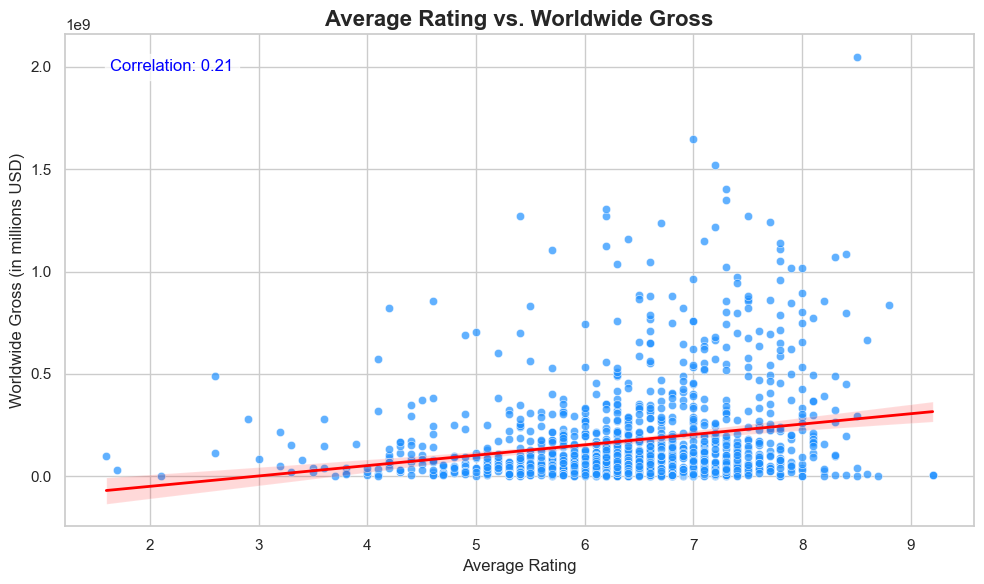

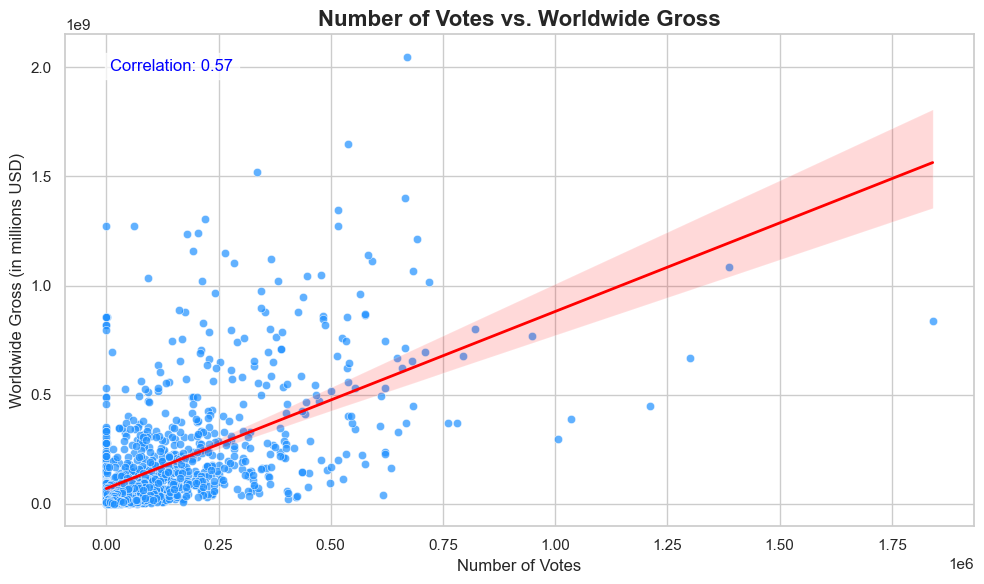

In [50]:
# Define colors for consistency
scatter_color = 'dodgerblue'  # Blue for scatter points
regression_color = 'red'      # Red for regression line

# Scatter plot: Average Rating vs Worldwide Gross
plt.figure(figsize=(10, 6))

# Scatter plot for Average Rating vs Worldwide Gross with uniform color
sns.scatterplot(data=merged_data, x='averagerating', y='worldwide_gross', alpha=0.7, color=scatter_color)

# Add regression line with the same color scheme
sns.regplot(data=merged_data, x='averagerating', y='worldwide_gross', scatter=False, color=regression_color, line_kws={'linewidth': 2})

# Title and labels
plt.title('Average Rating vs. Worldwide Gross', fontsize=16, weight='bold')
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Worldwide Gross (in millions USD)', fontsize=12)

# Add the correlation coefficient
correlation_rating_gross = merged_data['averagerating'].corr(merged_data['worldwide_gross'])
plt.text(0.05, 0.95, f'Correlation: {correlation_rating_gross:.2f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=12, color='blue', bbox=dict(facecolor='white', alpha=0.7))

# Show the plot
plt.tight_layout()
plt.show()

# Scatter plot: Number of Votes vs Worldwide Gross
plt.figure(figsize=(10, 6))

# Scatter plot for Number of Votes vs Worldwide Gross with uniform color
sns.scatterplot(data=merged_data, x='numvotes', y='worldwide_gross', alpha=0.7, color=scatter_color)

# Add regression line with the same color scheme
sns.regplot(data=merged_data, x='numvotes', y='worldwide_gross', scatter=False, color=regression_color, line_kws={'linewidth': 2})

# Title and labels
plt.title('Number of Votes vs. Worldwide Gross', fontsize=16, weight='bold')
plt.xlabel('Number of Votes', fontsize=12)
plt.ylabel('Worldwide Gross (in millions USD)', fontsize=12)

# Add the correlation coefficient
correlation_votes_gross = merged_data['numvotes'].corr(merged_data['worldwide_gross'])
plt.text(0.05, 0.95, f'Correlation: {correlation_votes_gross:.2f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=12, color='blue', bbox=dict(facecolor='white', alpha=0.7))

# Show the plot
plt.tight_layout()
plt.show()


## **4. Conclusion**
### Key Insights:
1. Action and Adventure genres generate the highest revenue.
2. Higher budgets tend to result in higher worldwide gross.
3. Summer and holiday release windows are the most profitable.
4. Major studios with large budgets dominate profit margins.
5. English-language movies lead in global performance, but specific non-English movies perform well in niche markets.
6. Audience engagement (via votes) correlates strongly with revenue, while high ratings alone are not a guarantee of success.



### Recommendations:
- Prioritize high-budget Action and Adventure films for global appeal.
- Align release schedules with profitable months (summer, holidays).
- Foster partnerships with top-performing studios.
- Invest in marketing strategies to increase audience engagement and votes.

---
